# Import libraries and Read Data


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_log_error
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
import datetime
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split


In [2]:
dataframe = pd.read_csv("train.csv")
dataframe.head()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Factorize Columns

In [4]:
dataframe["Seasons"], Categorical= pd.factorize(dataframe["Seasons"])
dataframe["Holiday"], Categorical= pd.factorize(dataframe["Holiday"])
dataframe["Functioning Day"], Categorical= pd.factorize(dataframe["Functioning Day"])

dataframe.head()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0


# Split "Date" Column


In [6]:
dataframe[['Day','Month',"Year"]] = dataframe.Date.str.split("/",expand=True,)
dataframe['Day'] = dataframe['Day'].astype(int)
dataframe['Month'] = dataframe['Month'].astype(int)

dataframe

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,12,2017
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,12,2017
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,12,2017
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,12,2017
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,5755,20/11/2018,1317,19,8.7,34,2.2,1857,-6.3,0.0,0.0,0.0,3,0,0,20,11,2018
5756,5756,20/11/2018,1078,20,8.5,32,2.6,1789,-7.2,0.0,0.0,0.0,3,0,0,20,11,2018
5757,5757,20/11/2018,1020,21,8.8,37,3.8,1750,-5.1,0.0,0.0,0.0,3,0,0,20,11,2018
5758,5758,20/11/2018,922,22,8.9,40,3.4,1810,-3.9,0.0,0.0,0.0,3,0,0,20,11,2018


# Correlcation

<AxesSubplot:>

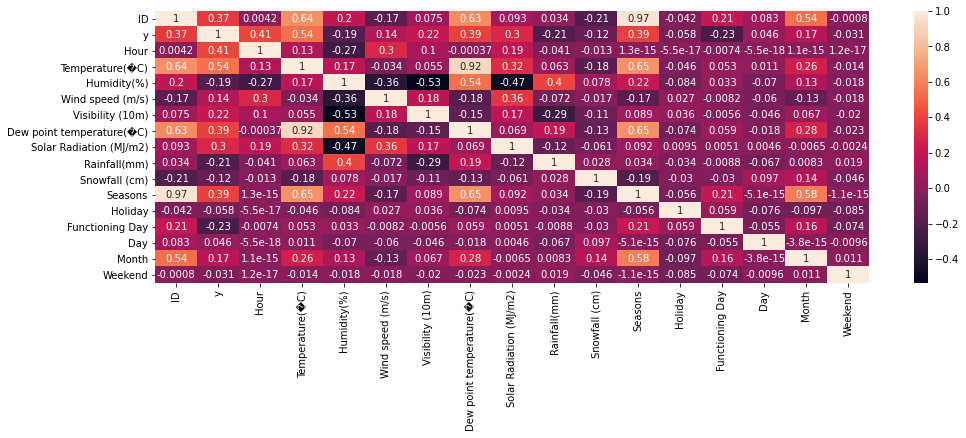

In [36]:
corr=dataframe.corr()
plt.figure(figsize = (16,5))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           annot=True)

# Feature Engineering

Weekend

In [8]:
weekend_list=[]

for i in range(len(dataframe["Date"])):
    date=dataframe.loc[i,"Date"]
    date_as_timestamp = datetime.datetime.strptime(date,"%d/%m/%Y")
    weekno = date_as_timestamp.weekday()
    if weekno < 5:
        weekend_list.append(0)
    else:  # 5 Sat, 6 Sun
        weekend_list.append(1)

    
dataframe["Weekend"]=pd.Series(weekend_list)


Wind speed (m/s)

In [10]:
#Creating bins and labels
bins = [0,0.1,0.3,0.5,0.7,1,1.5,2,2.5,3.25,4,5,8]
labels = [0,1,2,3,4,5,6,7,8,9,10,11]

dataframe['Wind speed (m/s)'] = pd.cut(dataframe['Wind speed (m/s)'],bins = bins, labels = labels)
dataframe['Wind speed (m/s)'] = dataframe['Wind speed (m/s)'].astype(float)



Visibility (10m)

In [12]:
#Creating bins and labels
bins = [0,300,600,1500,2000]
labels = [0,1,2,3]

dataframe['Visibility (10m)'] = pd.cut(dataframe['Visibility (10m)'],bins = bins, labels = labels)
dataframe['Visibility (10m)'] = dataframe['Visibility (10m)'].astype(int)

Rainfall(mm)

In [14]:
scaler = PowerTransformer()
dataframe["Rainfall(mm)"]=scaler.fit_transform(dataframe["Rainfall(mm)"].values.reshape(-1, 1))


Solar Radiation (MJ/m2)

In [16]:
scaler = PowerTransformer()
dataframe["Solar Radiation (MJ/m2)"]=scaler.fit_transform(dataframe["Solar Radiation (MJ/m2)"].values.reshape(-1, 1))


# Drop Columns

In [18]:
dataframe

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekend
0,0,01/12/2017,254,0,-5.2,37,7.0,3,-17.6,-0.846569,-0.247051,0.0,0,0,0,1,12,2017,0
1,1,01/12/2017,204,1,-5.5,38,4.0,3,-17.6,-0.846569,-0.247051,0.0,0,0,0,1,12,2017,0
2,2,01/12/2017,173,2,-6.0,39,4.0,3,-17.7,-0.846569,-0.247051,0.0,0,0,0,1,12,2017,0
3,3,01/12/2017,107,3,-6.2,40,4.0,3,-17.6,-0.846569,-0.247051,0.0,0,0,0,1,12,2017,0
4,4,01/12/2017,78,4,-6.0,36,7.0,3,-18.6,-0.846569,-0.247051,0.0,0,0,0,1,12,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,5755,20/11/2018,1317,19,8.7,34,7.0,3,-6.3,-0.846569,-0.247051,0.0,3,0,0,20,11,2018,0
5756,5756,20/11/2018,1078,20,8.5,32,8.0,3,-7.2,-0.846569,-0.247051,0.0,3,0,0,20,11,2018,0
5757,5757,20/11/2018,1020,21,8.8,37,9.0,3,-5.1,-0.846569,-0.247051,0.0,3,0,0,20,11,2018,0
5758,5758,20/11/2018,922,22,8.9,40,9.0,3,-3.9,-0.846569,-0.247051,0.0,3,0,0,20,11,2018,0


In [37]:
y=dataframe["y"]
x=dataframe.drop(columns=["ID","Date","y","Year"])



In [38]:
x

,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Weekend
0,0,-5.2,37,7.0,3,-17.6,-0.846569,-0.247051,0.0,0,0,0,1,12,0
1,1,-5.5,38,4.0,3,-17.6,-0.846569,-0.247051,0.0,0,0,0,1,12,0
2,2,-6.0,39,4.0,3,-17.7,-0.846569,-0.247051,0.0,0,0,0,1,12,0
3,3,-6.2,40,4.0,3,-17.6,-0.846569,-0.247051,0.0,0,0,0,1,12,0
4,4,-6.0,36,7.0,3,-18.6,-0.846569,-0.247051,0.0,0,0,0,1,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,19,8.7,34,7.0,3,-6.3,-0.846569,-0.247051,0.0,3,0,0,20,11,0
5756,20,8.5,32,8.0,3,-7.2,-0.846569,-0.247051,0.0,3,0,0,20,11,0
5757,21,8.8,37,9.0,3,-5.1,-0.846569,-0.247051,0.0,3,0,0,20,11,0
5758,22,8.9,40,9.0,3,-3.9,-0.846569,-0.247051,0.0,3,0,0,20,11,0



# Model

In [50]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xg_reg.fit(x,y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
score = xg_reg.score(x, y)   
print("Training score: ", score)

Training score:  0.9913797191098953


C:\Users\omara\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
